In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

arq = h5py.File("Synthetic_Full_iHall.hdf5", "r")

load_qtd = "1"

rawSamples = arq[load_qtd]["i"]
rawEvents = arq[load_qtd]["events"]    
rawLabels = arq[load_qtd]["labels"]

In [1]:
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified SNR in dB. It also
    returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)

    author - Mathuranathan Viswanathan (gaussianwaves.com)
    This code is part of the book Digital Modulations using Python

    https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/
    """

    gamma = 10**(SNRdB/10) #SNR to linear scale
    
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    
    N0=P/gamma # Find the noise spectral density
    
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    
    # r = s + n # received signal

    return n

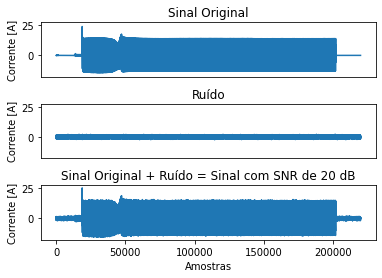

In [37]:
x = rawSamples[10 * 16][60000:280000]
SNR = 20

noise = awgn(x, SNR)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)
ax1.plot(x)
ax1.set_ylabel("Corrente [A]")
ax1.set_title("Sinal Original")
ax1.set_xticks([])

ax2.plot(noise)
ax2.set_ylabel("Corrente [A]")
ax2.set_title("Ruído")
ax2.set_xticks([])


ax3.plot(x + noise)
ax3.set_ylabel("Corrente [A]")
ax3.set_title(f"Sinal Original + Ruído = Sinal com SNR de {SNR} dB")
ax3.set_xlabel("Amostras")

plt.subplots_adjust(hspace=0.5)

plt.savefig("awgn-example.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Micro-ondas Standby\n(Ângulo de Acionamento = -360°)')

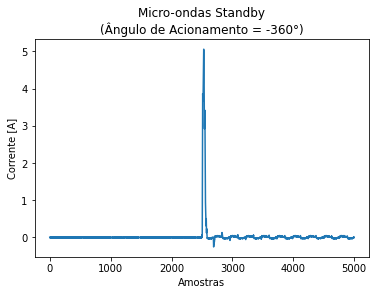

In [87]:
example = -16

x = rawSamples[example]

on_sample = np.argwhere(rawEvents[example] == 1)[0, 0]

plt.figure()
plt.plot(x[on_sample - 2500 : on_sample + 2500])
plt.ylabel("Corrente [A]")
plt.xlabel("Amostras")
plt.title(f"Micro-ondas Standby\n(Ângulo de Acionamento = {int(example * 360/16)}°)")
# plt.savefig("angle_example0.pdf", bbox_inches='tight')

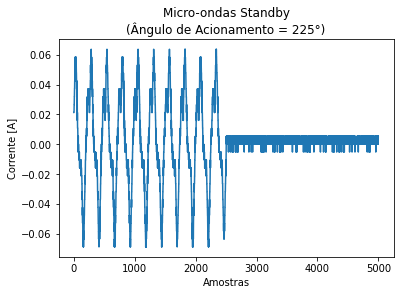

In [56]:
example = 10

x = rawSamples[example]

on_sample = np.argwhere(rawEvents[example] == -1)[0, 0]

plt.figure()
plt.plot(x[on_sample - 2500 : on_sample + 2500])
plt.ylabel("Corrente [A]")
plt.xlabel("Amostras")
plt.title(f"Micro-ondas Standby\n(Ângulo de Acionamento = {int(example * 360/16)}°)")
plt.savefig("angle_example_off1.pdf", bbox_inches='tight')

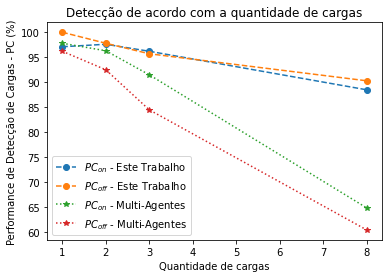

In [29]:
import matplotlib.pyplot as plt

deepdfml_nilm = [[97.1, 97.6, 96.2, 88.5],
                 [100, 97.8, 95.7, 90.3]]

multi_agents = [[97.8, 96.3, 91.5, 64.9],
                [96.2, 92.5, 84.5, 60.5]]

x = [1, 2, 3, 8]

plt.figure()
plt.plot(x, deepdfml_nilm[0], 'o', label='$PC_{on}$ - Este Trabalho', linestyle='dashed')
plt.plot(x, deepdfml_nilm[1], 'o', label='$PC_{off}$ - Este Trabalho', linestyle='dashed')
plt.plot(x, multi_agents[0], '*', label='$PC_{on}$ - Multi-Agentes', linestyle='dotted')
plt.plot(x, multi_agents[1], '*', label='$PC_{off}$ - Multi-Agentes', linestyle='dotted')
plt.title("Detecção de acordo com a quantidade de cargas")
plt.ylabel("Performance de Detecção de Cargas - PC (%)")
plt.xlabel("Quantidade de cargas")
plt.legend()
plt.savefig('../detection_comparison.pdf', bbox_inches='tight')

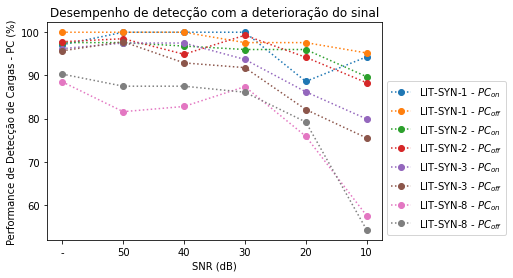

In [20]:
lit_syn_1 = [[97.1, 100.0, 100.0, 100.0, 88.6, 94.3],
             [100.0, 100.0, 100.0, 97.6, 97.6, 95.2]]

lit_syn_2 = [[97.6, 97.6, 96.8, 96.0, 96.0, 89.7],
             [97.8, 98.5, 94.9, 99.3, 94.2, 88.3]]

lit_syn_3 = [[96.2, 97.5, 97.5, 93.7, 86.2, 79.9],
             [95.7, 97.8, 92.9, 91.8, 82.1, 75.5]]

lit_syn_8 = [[88.5, 81.6, 82.8, 87.4, 75.9, 57.5],
             [90.3, 87.5, 87.5, 86.1, 79.2, 54.2]]

lit_syn_all = [[95.1, 94.3, 94.3, 93.6, 87.2, 79.4],
               [95.9, 96.6, 93.3, 93.8, 86.9, 77.9]]

x = ["-", "50", "40", "30", "20", "10"]

plt.figure()
plt.plot(x, lit_syn_1[0], 'o', linestyle='dotted', label='LIT-SYN-1 - $PC_{on}$')
plt.plot(x, lit_syn_1[1], 'o', linestyle='dotted', label='LIT-SYN-1 - $PC_{off}$')
plt.plot(x, lit_syn_2[0], 'o', linestyle='dotted', label='LIT-SYN-2 - $PC_{on}$')
plt.plot(x, lit_syn_2[1], 'o', linestyle='dotted', label='LIT-SYN-2 - $PC_{off}$')
plt.plot(x, lit_syn_3[0], 'o', linestyle='dotted', label='LIT-SYN-3 - $PC_{on}$')
plt.plot(x, lit_syn_3[1], 'o', linestyle='dotted', label='LIT-SYN-3 - $PC_{off}$')
plt.plot(x, lit_syn_8[0], 'o', linestyle='dotted', label='LIT-SYN-8 - $PC_{on}$')
plt.plot(x, lit_syn_8[1], 'o', linestyle='dotted', label='LIT-SYN-8 - $PC_{off}$')
# plt.plot(x, lit_syn_all[0], '*', linestyle='dashed', label='LIT-SYN - $PC_{on}$')
# plt.plot(x, lit_syn_all[1], '*', linestyle='dashed', label='LIT-SYN - $PC_{off}$')
plt.ylabel("Performance de Detecção de Cargas - PC (%)")
plt.xlabel("SNR (dB)")
plt.title("Desempenho de detecção com a deterioração do sinal")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")
plt.savefig('../noise_detection_comparison.pdf', bbox_inches='tight')

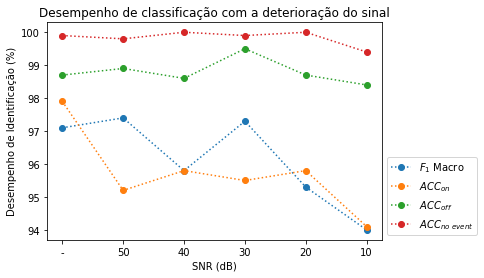

In [21]:
import matplotlib.pyplot as plt

f1_score = [97.1, 97.4, 95.8, 97.3, 95.3, 94.0]
acc_on = [97.9, 95.2, 95.8, 95.5, 95.8, 94.1]
acc_off = [98.7, 98.9, 98.6, 99.5, 98.7, 98.4]
acc_no_event = [99.9, 99.8, 100.0, 99.9, 100.0, 99.4]

x = ["-", "50", "40", "30", "20", "10"]

fig, ax = plt.subplots()
ax.plot(x, f1_score, 'o', linestyle='dotted', label='$F_1$ Macro')
ax.plot(x, acc_on, 'o', linestyle='dotted', label='$ACC_{on}$')
ax.plot(x, acc_off, 'o', linestyle='dotted', label='$ACC_{off}$')
ax.plot(x, acc_no_event, 'o', linestyle='dotted', label='$ACC_{no\ event}$')
# ax.set_ylim(88, 102)

plt.ylabel("Desempenho de Identificação (%)")
plt.xlabel("SNR (dB)")
plt.title("Desempenho de classificação com a deterioração do sinal")
plt.legend(bbox_to_anchor=(1,0), loc="lower left")

plt.savefig('../noise_classification_comparison.pdf', bbox_inches='tight')

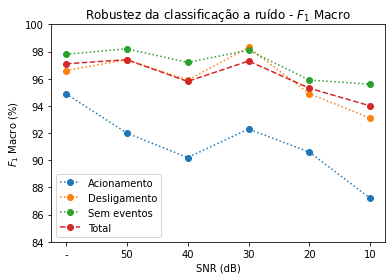

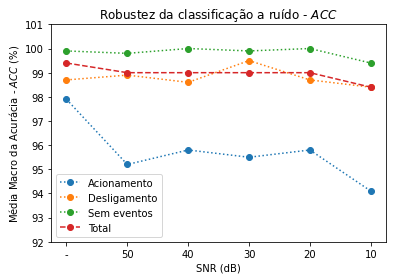

In [41]:
import matplotlib.pyplot as plt

f1_score_total = [97.1, 97.4, 95.8, 97.3, 95.3, 94.0]
f1_score_on = [94.9, 92.0, 90.2, 92.3, 90.6, 87.2]
f1_score_off = [96.6, 97.4, 95.9, 98.3, 94.9, 93.1]
f1_score_no_event = [97.8, 98.2, 97.2, 98.1, 95.9, 95.6]
acc_total = [99.4, 99.0, 99.0, 99.0, 99.0, 98.4]
acc_on = [97.9, 95.2, 95.8, 95.5, 95.8, 94.1]
acc_off = [98.7, 98.9, 98.6, 99.5, 98.7, 98.4]
acc_no_event = [99.9, 99.8, 100.0, 99.9, 100.0, 99.4]

x = ["-", "50", "40", "30", "20", "10"]

fig, ax = plt.subplots()
ax.plot(x, f1_score_on, 'o', linestyle='dotted', label='Acionamento')
ax.plot(x, f1_score_off, 'o', linestyle='dotted', label='Desligamento')
ax.plot(x, f1_score_no_event, 'o', linestyle='dotted', label='Sem eventos')
ax.plot(x, f1_score_total, 'o', linestyle='dashed', label='Total')
ax.set_ylim(84, 100)

plt.ylabel("$F_1$ Macro (%)")
plt.xlabel("SNR (dB)")
plt.title("Robustez da classificação a ruído - $F_1$ Macro")
plt.legend()

plt.savefig('../noise_classification_comparison_f1.pdf', bbox_inches='tight')

fig, ax = plt.subplots()
ax.plot(x, acc_on, 'o', linestyle='dotted', label='Acionamento')
ax.plot(x, acc_off, 'o', linestyle='dotted', label='Desligamento')
ax.plot(x, acc_no_event, 'o', linestyle='dotted', label='Sem eventos')
ax.plot(x, acc_total, 'o', linestyle='dashed', label='Total')
ax.set_ylim(92, 101)

plt.ylabel("Média Macro da Acurácia - $ACC$ (%)")
plt.xlabel("SNR (dB)")
plt.title("Robustez da classificação a ruído - $ACC$")
plt.legend()

plt.savefig('../noise_classification_comparison_acc.pdf', bbox_inches='tight')

In [ ]:
f1 = [94.9, 96.6, 97.8, 97.1]
acc = [97.9, 98.7, 99.9, 99.4]

no_weights_f1 = [91.0, 98.5, 98.9, 98.0]
no_weights_acc = [90.8, 98.2, 99.3, 98.1]

